<img src="https://4friendsnihongo.com/wp-content/uploads/2019/10/Tokyo-2020-Olympics-Banner.jpg" alt="Drawing" style="width: 200px;" class="center"/>


# Importing main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setting Up Tweepy to use Twitter API

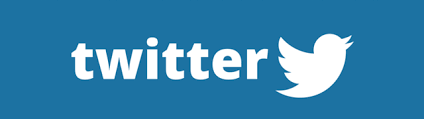

## Twitter Authentication

In [2]:
import tweepy as tw

In [3]:
#authentication information.
consumer_key ='****'
consumer_secret='****'
access_token='****'
access_token_secret='****'

In [4]:
#Authentication
auth=tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tw.API(auth,wait_on_rate_limit=True)

## Collect Tweets

In [ ]:
# #fetch tweets

# hashtag = '#F9'
# query = tw.Cursor(api.search,q=hashtag, lang='en').items(2000)
# tweets = [{'Tweets':tweet.text,'Timestamp':tweet.created_at} for tweet in query]
# print(tweets)


In [6]:
#create a copy of the raw data
tweet=tweets.copy()

In [7]:
#view data
data=pd.DataFrame.from_dict(tweet)
data.head()

Tweets           Timestamp
0       #F9 is so disappointing .. lacked everything 2021-08-09 12:24:23
1  follow : @TweetsNMC \n\n#F9 #VinDiesel #Domini... 2021-08-09 12:22:46
2  RT @InnerCityGeeks: NEW EPISODE OF THE #PODCAS... 2021-08-09 12:21:31
3  Nah, everybody will know your tremendous feat,... 2021-08-09 12:21:01
4        F9: The Fast Saga... The drama 🤦🏽‍♀️🙄😒\n#F9 2021-08-09 12:16:19

## Export Collected Data

In [9]:
data.to_csv(r'/original/tokyo2020all.csv', index = False)
data.to_csv(r'/original/tokyo2020all.txt', index = False)

# Load Exported data to Data Frame

In [2]:
text_data='original/tokyo2020all.txt'

In [3]:
data_txt = pd.read_csv(text_data)

In [4]:
data_txt.shape

(2000, 2)

In [5]:
df=data_txt.copy()

In [6]:
df.head()

Tweets            Timestamp
0  RT @stadiumastro: NUR DHABITAH IS THROUGH TO T...  2021-07-31 07:26:36
1  Limerick is incredibly proud of @sarahlavin_ 🏃...  2021-07-31 07:26:36
2  RT @stadiumastro: NUR DHABITAH IS THROUGH TO T...  2021-07-31 07:26:36
3  RT @Ra_THORe: Amazing performance! \n#Kamalpre...  2021-07-31 07:26:36
4  RT @BadmintonTalk: INDONESIA #INA Men's Single...  2021-07-31 07:26:36

# EDA

## Data Shape

In [7]:
eda = df.copy()

In [8]:
eda.shape

(2000, 2)

## Data Types and Null count

In [9]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweets     2000 non-null   object
 1   Timestamp  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## Scraped Tweets WordCloud

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 270852 words in the combination of all cells in column Tweets.


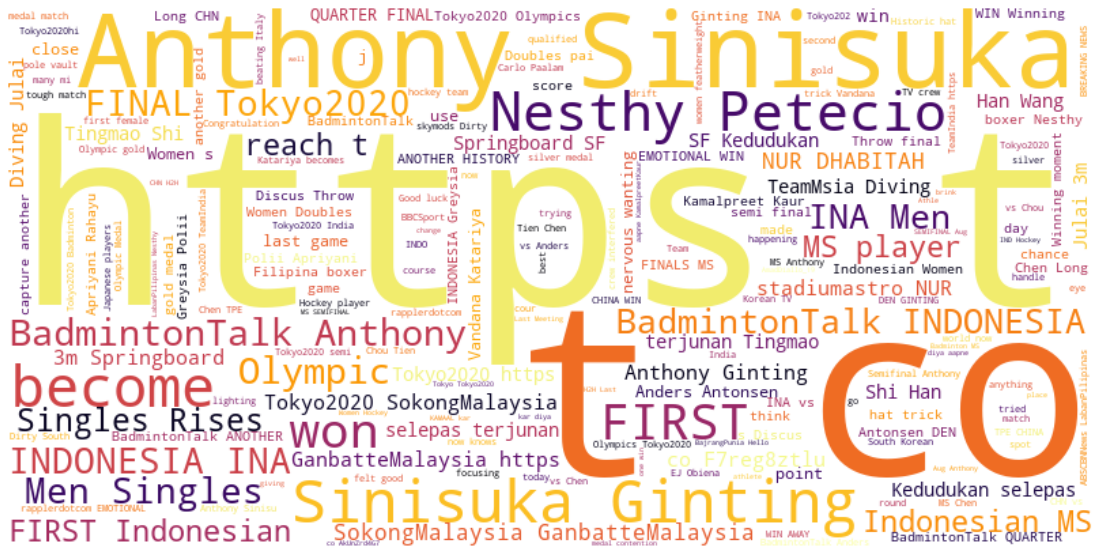

In [11]:
# Text of all words in column Tweets

text = " ".join(review for review in eda.Tweets.astype(str))
print ("There are {} words in the combination of all cells in column Tweets.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(['RT','#F9'])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,colormap='inferno').generate(text)

# Display the generated image:
# the matplotlib way:

fig=plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Language Detection

In [12]:
from langdetect import detect

lang = detect(text)

print(lang)

en


# Data Preprocessing

In [13]:
df_cleaning=df.copy()

In [14]:
df_cleaning.head()

Tweets            Timestamp
0  RT @stadiumastro: NUR DHABITAH IS THROUGH TO T...  2021-07-31 07:26:36
1  Limerick is incredibly proud of @sarahlavin_ 🏃...  2021-07-31 07:26:36
2  RT @stadiumastro: NUR DHABITAH IS THROUGH TO T...  2021-07-31 07:26:36
3  RT @Ra_THORe: Amazing performance! \n#Kamalpre...  2021-07-31 07:26:36
4  RT @BadmintonTalk: INDONESIA #INA Men's Single...  2021-07-31 07:26:36

## Removing Hashtags and Mentions

In [15]:
import re
def cleaning_hash_mentions(data):
    return re.sub("((#[A-Za-z0-9]+)|(@[A-Za-z0-9]+))",' ',data)

df_cleaning['tweets_no_tags'] = df_cleaning['Tweets'].apply(lambda x: cleaning_hash_mentions(x))

## Removing URLs

In [16]:
#remove URLs
import re
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

df_cleaning['tweets_no_url'] = df_cleaning['tweets_no_tags'].apply(lambda x: cleaning_URLs(x))

## Removing Numbers

In [17]:
#remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_cleaning['tweets_no_num'] = df_cleaning['tweets_no_url'].apply(lambda x: cleaning_numbers(x))

## Set to Lower Case

In [18]:
# Lower case all words
df_cleaning['tweets_lower'] = df_cleaning['tweets_no_num'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Removing Punctuations

In [19]:
# Remove Punctuation
df_cleaning['tweets_nopunc'] = df_cleaning['tweets_lower'].str.replace('[^\w\s]', '')

<ipython-input-19-92b1699700d6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cleaning['tweets_nopunc'] = df_cleaning['tweets_lower'].str.replace('[^\w\s]', '')


## Removing Stopwords

In [20]:
# Import stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Remove Stopwords
df_cleaning['tweets_nopunc_nostop'] = df_cleaning['tweets_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haziq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Return frequency of values
freq= pd.Series(" ".join(df_cleaning['tweets_nopunc_nostop']).split()).value_counts()[:30]

In [22]:
freq

rt             1821
anthony         376
ginting         362
first           321
womens          265
win             242
ms              231
gold            223
sinisuka        218
finals          200
final           199
nesthy          196
become          195
indonesia       193
indonesian      185
petecio         185
medal           184
mens            181
player          180
dhabitah        139
olympic         137
singles         133
reach           131
game            130
another         129
rises           128
nur             127
springboard     117
last            116
vs              113
dtype: int64

In [23]:
other_stopwords = ['rt', 'tokyo2020', 'reach','ganbattemalaysia','badmintontalk','sokongmalaysia']

In [24]:
df_cleaning['tweets_nopunc_nostop_nocommon'] = df_cleaning['tweets_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in other_stopwords)))

## Lemmatization

In [25]:
# Import textblob
from textblob import Word
nltk.download('wordnet')

# Lemmatize final review format
df_cleaning['cleaned_tweets'] = df_cleaning['tweets_nopunc_nostop_nocommon']\
.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Haziq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Output from Preprocessing

In [26]:
df_cleaning.head()

Tweets            Timestamp  \
0  RT @stadiumastro: NUR DHABITAH IS THROUGH TO T...  2021-07-31 07:26:36   
1  Limerick is incredibly proud of @sarahlavin_ 🏃...  2021-07-31 07:26:36   
2  RT @stadiumastro: NUR DHABITAH IS THROUGH TO T...  2021-07-31 07:26:36   
3  RT @Ra_THORe: Amazing performance! \n#Kamalpre...  2021-07-31 07:26:36   
4  RT @BadmintonTalk: INDONESIA #INA Men's Single...  2021-07-31 07:26:36   

                                      tweets_no_tags  \
0  RT  : NUR DHABITAH IS THROUGH TO THE FINAL!\n\...   
1  Limerick is incredibly proud of  _ 🏃‍♀️ She is...   
2  RT  : NUR DHABITAH IS THROUGH TO THE FINAL!\n\...   
3  RT  _THORe: Amazing performance! \n  advances ...   
4  RT  : INDONESIA   Men's Singles Rises Again!\n...   

                                       tweets_no_url  \
0  RT  : NUR DHABITAH IS THROUGH TO THE FINAL!\n\...   
1  Limerick is incredibly proud of  _ 🏃‍♀️ She is...   
2  RT  : NUR DHABITAH IS THROUGH TO THE FINAL!\n\...   
3  RT  _THORe: Amazing performance! \n  advances ...   
4  RT  : INDONESIA   Men's Singles Rises Again!\n...   

                                       tweets_no_num  \
0  RT  : NUR DHABITAH IS THROUGH TO THE FINAL!\n\...   
1  Limerick is incredibly proud of  _ 🏃‍♀️ She is...   
2  RT  : NUR DHABITAH IS THROUGH TO THE FINAL!\n\...   
3  RT  _THORe: Amazing performance! \n  advances ...   
4  RT  : INDONESIA   Men's Singles Rises Again!\n...   

                                        tweets_lower  \
0         rt : nur dhabitah is through to the final!   
1  limerick is incredibly proud of _ 🏃‍♀️ she is ...   
2         rt : nur dhabitah is through to the final!   
3  rt _thore: amazing performance! advances to wo...   
4  rt : indonesia men's singles rises again! anth...   

                                       tweets_nopunc  \
0           rt  nur dhabitah is through to the final   
1  limerick is incredibly proud of _  she is a ph...   
2           rt  nur dhabitah is through to the final   
3  rt _thore amazing performance advances to wome...   
4  rt  indonesia mens singles rises again anthony...   

                                tweets_nopunc_nostop  \
0                              rt nur dhabitah final   
1  limerick incredibly proud _ phenomenal athlete...   
2                              rt nur dhabitah final   
3  rt _thore amazing performance advances womens ...   
4  rt indonesia mens singles rises anthony sinisu...   

                       tweets_nopunc_nostop_nocommon  \
0                                 nur dhabitah final   
1  limerick incredibly proud _ phenomenal athlete...   
2                                 nur dhabitah final   
3  _thore amazing performance advances womens dis...   
4  indonesia mens singles rises anthony sinisuka ...   

                                      cleaned_tweets  
0                                 nur dhabitah final  
1  limerick incredibly proud _ phenomenal athlete...  
2                                 nur dhabitah final  
3  _thore amazing performance advance woman discu...  
4  indonesia men single rise anthony sinisuka gin...

## Convert Tweet Time Object to Timestamp

In [27]:
df_cleaning['Timestamp'] = pd.to_datetime(df_cleaning['Timestamp'])

In [28]:
df_cleaning.dtypes

Tweets                                   object
Timestamp                        datetime64[ns]
tweets_no_tags                           object
tweets_no_url                            object
tweets_no_num                            object
tweets_lower                             object
tweets_nopunc                            object
tweets_nopunc_nostop                     object
tweets_nopunc_nostop_nocommon            object
cleaned_tweets                           object
dtype: object

In [29]:
df_cleaned= df_cleaning[["cleaned_tweets","Timestamp"]]

In [30]:
df_cleaned.head()

cleaned_tweets           Timestamp
0                                 nur dhabitah final 2021-07-31 07:26:36
1  limerick incredibly proud _ phenomenal athlete... 2021-07-31 07:26:36
2                                 nur dhabitah final 2021-07-31 07:26:36
3  _thore amazing performance advance woman discu... 2021-07-31 07:26:36
4  indonesia men single rise anthony sinisuka gin... 2021-07-31 07:26:36

## Export Cleaned Data

In [31]:
df_cleaned.to_csv('cleaned/tokyo2020_cleaned.csv', index = False)
df_cleaned.to_csv('cleaned/tokyo2020_cleaned.txt', index = False)

# Sentiment Analysis

In [32]:
df_sa=df_cleaned.copy()

In [33]:
# Calculate polarity and subjectivity
from textblob import TextBlob
df_sa['polarity'] = df_sa['cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment[0])
df_sa['subjectivity'] = df_sa['cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment[1])

In [34]:
df_sa.head()

cleaned_tweets           Timestamp  \
0                                 nur dhabitah final 2021-07-31 07:26:36   
1  limerick incredibly proud _ phenomenal athlete... 2021-07-31 07:26:36   
2                                 nur dhabitah final 2021-07-31 07:26:36   
3  _thore amazing performance advance woman discu... 2021-07-31 07:26:36   
4  indonesia men single rise anthony sinisuka gin... 2021-07-31 07:26:36   

   polarity  subjectivity  
0  0.000000       1.00000  
1  0.650000       0.75000  
2  0.000000       1.00000  
3  0.300000       0.95000  
4  0.089286       0.27381

## Polarity Label

In [35]:
df_label = df_sa.copy()

In [36]:
def polar_label(polar):
  if polar<0:
    return "negative"
  elif polar==0:
    return "neutral"
  else:
    return "positive"

df_label['polar_label'] = df_label['polarity'].apply(lambda x: polar_label(x))

In [37]:
def subj_label(subj):
  if subj<0.5:
    return "objective"
  elif subj==0.5:
    return "neutral"
  else:
    return "subjective"

df_label['subj_label'] = df_label['subjectivity'].apply(lambda x: subj_label(x))

In [38]:
df_label[['cleaned_tweets','polarity', 'subjectivity','polar_label','subj_label']].head()

cleaned_tweets  polarity  subjectivity  \
0                                 nur dhabitah final  0.000000       1.00000   
1  limerick incredibly proud _ phenomenal athlete...  0.650000       0.75000   
2                                 nur dhabitah final  0.000000       1.00000   
3  _thore amazing performance advance woman discu...  0.300000       0.95000   
4  indonesia men single rise anthony sinisuka gin...  0.089286       0.27381   

  polar_label  subj_label  
0     neutral  subjective  
1    positive  subjective  
2     neutral  subjective  
3    positive  subjective  
4    positive   objective

In [39]:
df_label['polar_label'].value_counts()

positive    989
neutral     842
negative    169
Name: polar_label, dtype: int64

In [40]:
df_label['subj_label'].value_counts()

objective     1226
subjective     719
neutral         55
Name: subj_label, dtype: int64

In [41]:
df_label.isna().sum()

cleaned_tweets    0
Timestamp         0
polarity          0
subjectivity      0
polar_label       0
subj_label        0
dtype: int64

## Polarity & Subjectivity Score

In [42]:
df_label[['polarity','subjectivity']].describe()

polarity  subjectivity
count  2000.000000   2000.000000
mean      0.134933      0.413012
std       0.250944      0.354464
min      -1.000000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.333333
75%       0.250000      0.650000
max       1.000000      1.000000

## Visualization

### Moving Averages

In [43]:
df_vis = df_label.copy()

In [44]:
df_mov_avg = df_vis[['Timestamp', 'polarity','subjectivity']]
df_mov_avg = df_mov_avg.sort_values(by='Timestamp', ascending=True)
df_mov_avg['MA Polarity'] = df_mov_avg.polarity.rolling(10, min_periods=3).mean()
df_mov_avg['MA Subjectivity'] = df_mov_avg.subjectivity.rolling(10, min_periods=3).mean()

In [45]:
df_mov_avg.tail()

Timestamp  polarity  subjectivity  MA Polarity  MA Subjectivity
4 2021-07-31 07:26:36  0.089286       0.27381     0.116323         0.401171
3 2021-07-31 07:26:36  0.300000       0.95000     0.146323         0.496171
2 2021-07-31 07:26:36  0.000000       1.00000     0.133823         0.579504
1 2021-07-31 07:26:36  0.650000       0.75000     0.155489         0.594504
0 2021-07-31 07:26:36  0.000000       1.00000     0.188823         0.654504

In [46]:
df_mov_avg.dtypes

Timestamp          datetime64[ns]
polarity                  float64
subjectivity              float64
MA Polarity               float64
MA Subjectivity           float64
dtype: object

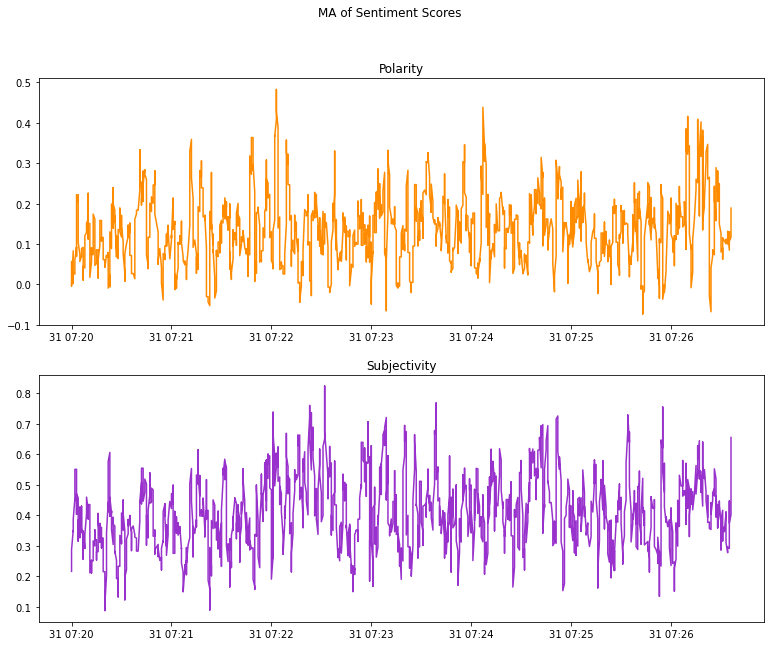

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(df_mov_avg['Timestamp'], df_mov_avg['MA Polarity'], color='darkorange')
axes[0].set_title("\n".join(["Polarity"]))
axes[1].plot(df_mov_avg['Timestamp'], df_mov_avg['MA Subjectivity'], color='darkorchid')
axes[1].set_title("\n".join(["Subjectivity"]))


fig.suptitle("\n".join(["MA of Sentiment Scores"]), y=0.98)
plt.show()

### Cleaned Tweets WordCloud

There are 130215 words in the combination of all cells in column Tweets.


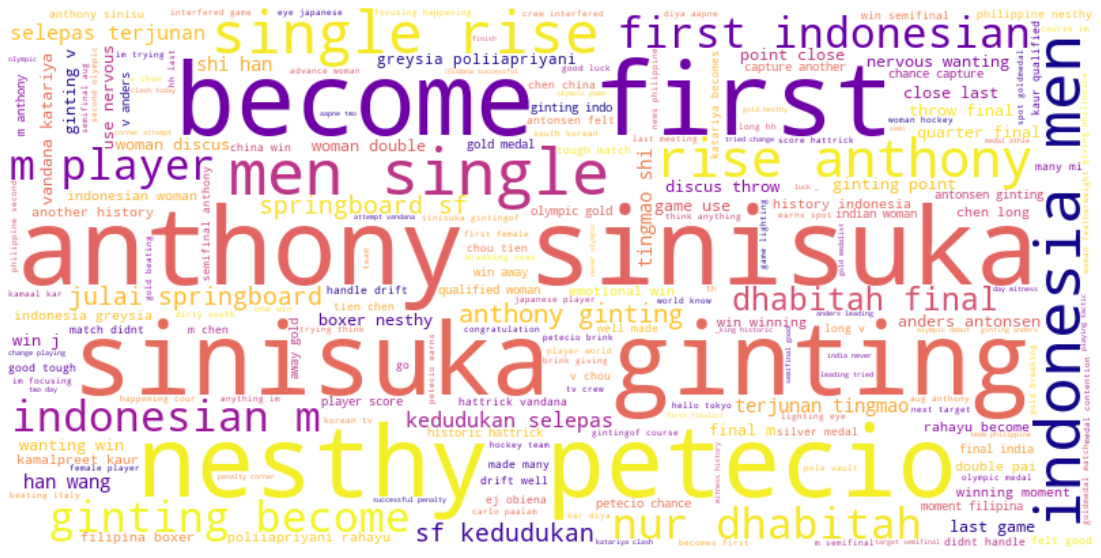

In [48]:
# Text of all words in column Tweets

text = " ".join(review for review in df_cleaned.cleaned_tweets.astype(str))
print ("There are {} words in the combination of all cells in column Tweets.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,colormap='plasma').generate(text)

# Display the generated image:
# the matplotlib way:

fig=plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Positive Tweets WordCloud

There are 72234 words in the combination of all cells in column Tweets.


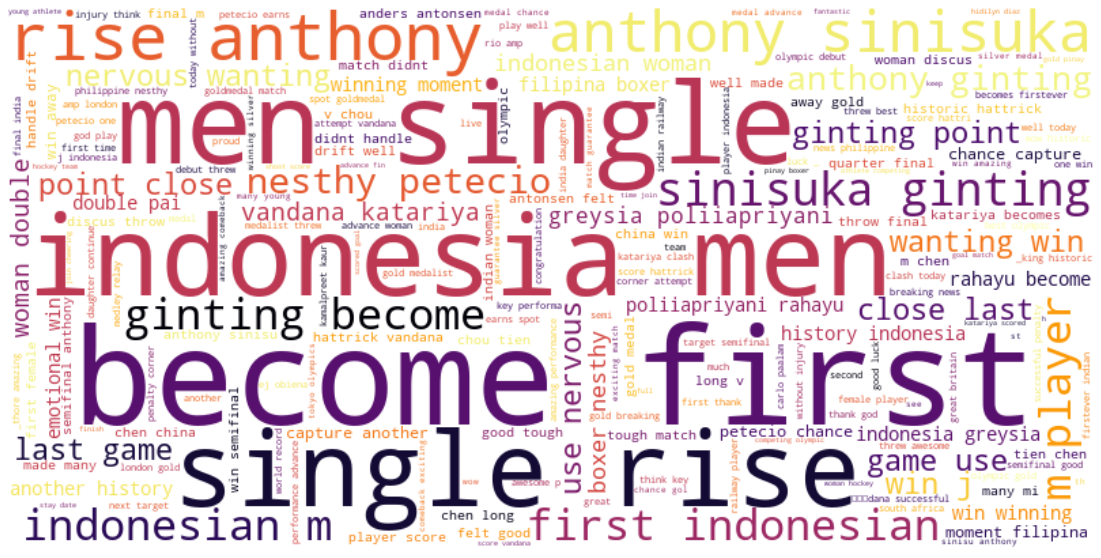

In [49]:
df_pos = df_vis[df_vis['polar_label']=='positive']

# Text of all words in column Tweets

text = " ".join(review for review in df_pos.cleaned_tweets.astype(str))
print ("There are {} words in the combination of all cells in column Tweets.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,colormap='inferno').generate(text)

# Display the generated image:
# the matplotlib way:

fig=plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Negative Tweets WordCloud

There are 11599 words in the combination of all cells in column Tweets.


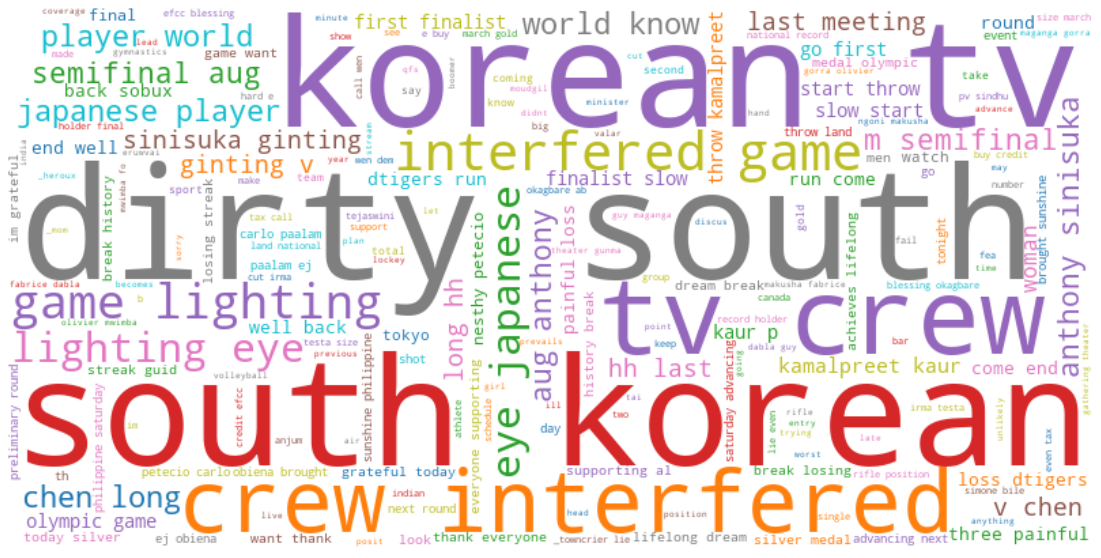

In [50]:
df_neg = df_vis[df_vis['polar_label']=='negative']

# Text of all words in column Tweets

text = " ".join(review for review in df_neg.cleaned_tweets.astype(str))
print ("There are {} words in the combination of all cells in column Tweets.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,colormap='tab10').generate(text)

# Display the generated image:
# the matplotlib way:

fig=plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Objective Tweets WordCloud

There are 81725 words in the combination of all cells in column Tweets.


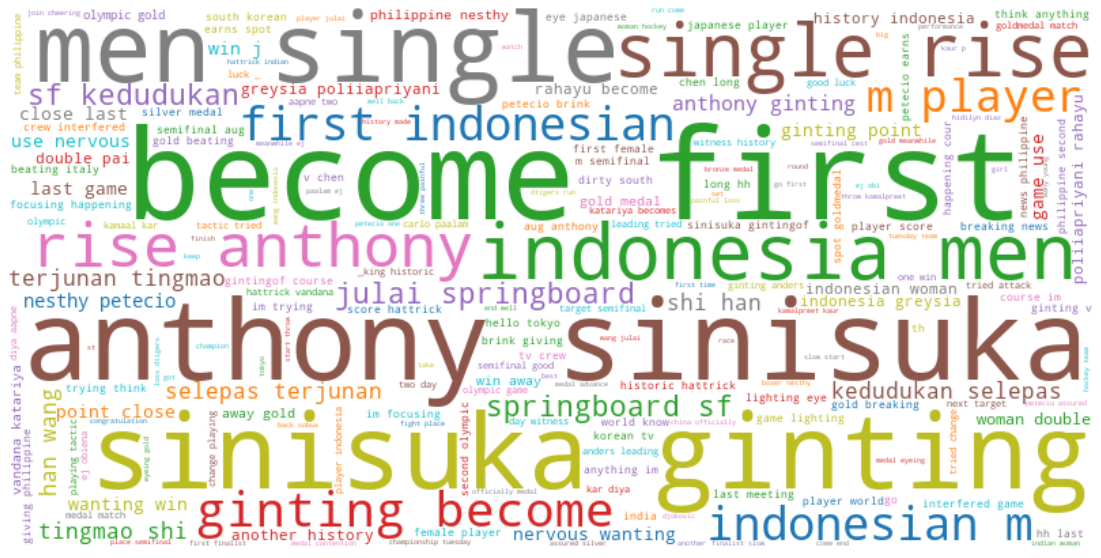

In [51]:
df_obj = df_vis[df_vis['subj_label']=='objective']

# Text of all words in column Tweets

text = " ".join(review for review in df_obj.cleaned_tweets.astype(str))
print ("There are {} words in the combination of all cells in column Tweets.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,colormap='tab10').generate(text)

# Display the generated image:
# the matplotlib way:

fig=plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Subjective Tweets WordCloud

There are 44634 words in the combination of all cells in column Tweets.


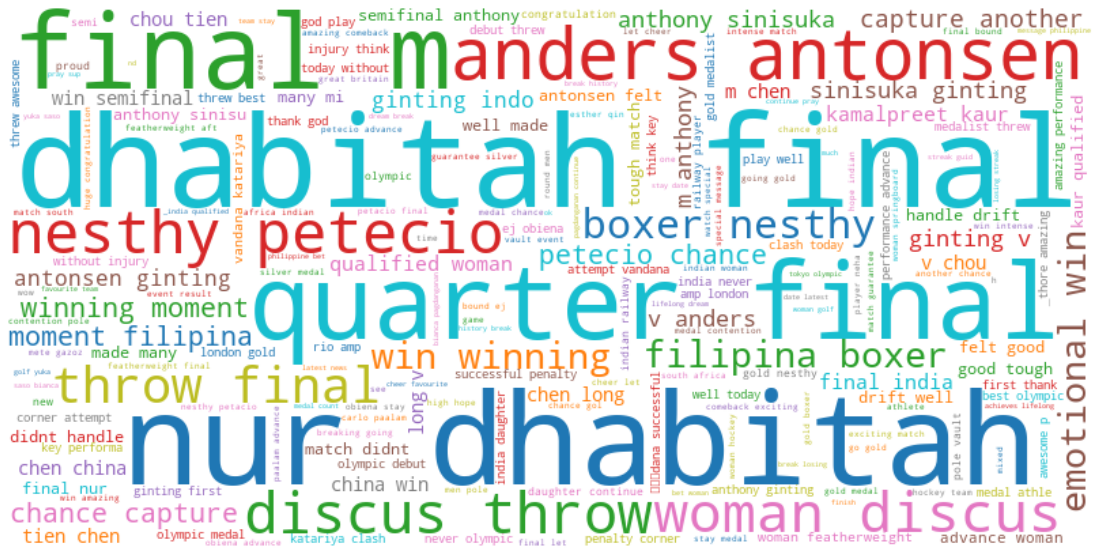

In [52]:
df_subj = df_vis[df_vis['subj_label']=='subjective']

# Text of all words in column Tweets

text = " ".join(review for review in df_subj.cleaned_tweets.astype(str))
print ("There are {} words in the combination of all cells in column Tweets.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,colormap='tab10').generate(text)

# Display the generated image:
# the matplotlib way:

fig=plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Label Count and Correlation Heatmap

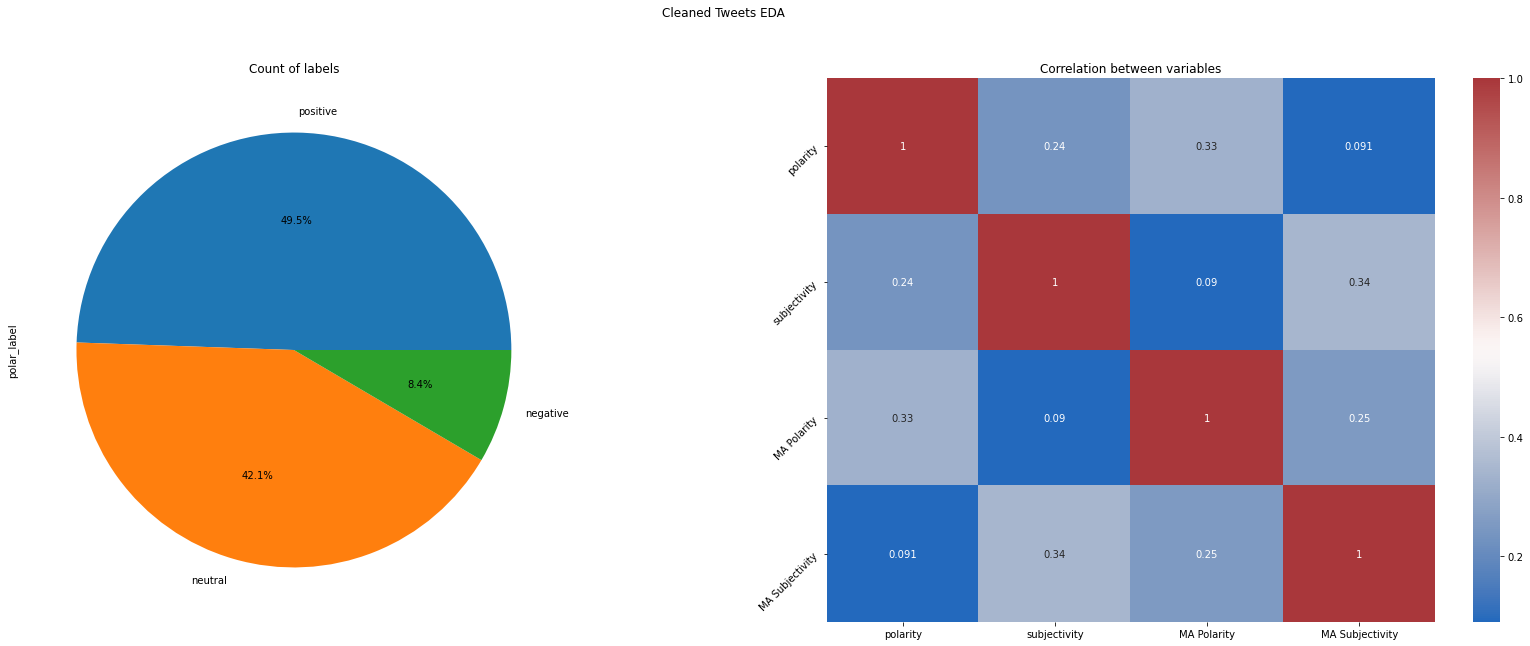

<Figure size 720x720 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2)
plt.figure(figsize=(10,10))
fig.set_size_inches(30,10)

fig.suptitle('Cleaned Tweets EDA')
label_counts=df_vis['polar_label'].value_counts()
label_counts.plot(kind='pie',autopct='%1.1f%%',ax=axs[0])
axs[0].set_title("Count of labels")

corr = df_mov_avg.corr()
sns.heatmap(corr,ax=axs[1],annot=True,cmap="vlag")
axs[1].set_title("Correlation between variables")
axs[1].tick_params(labelrotation=45,axis='y')

plt.show()


### Correlation Between Polarity and Subjectivity

C:\Users\Haziq\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Haziq\Anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
C:\Users\Haziq\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


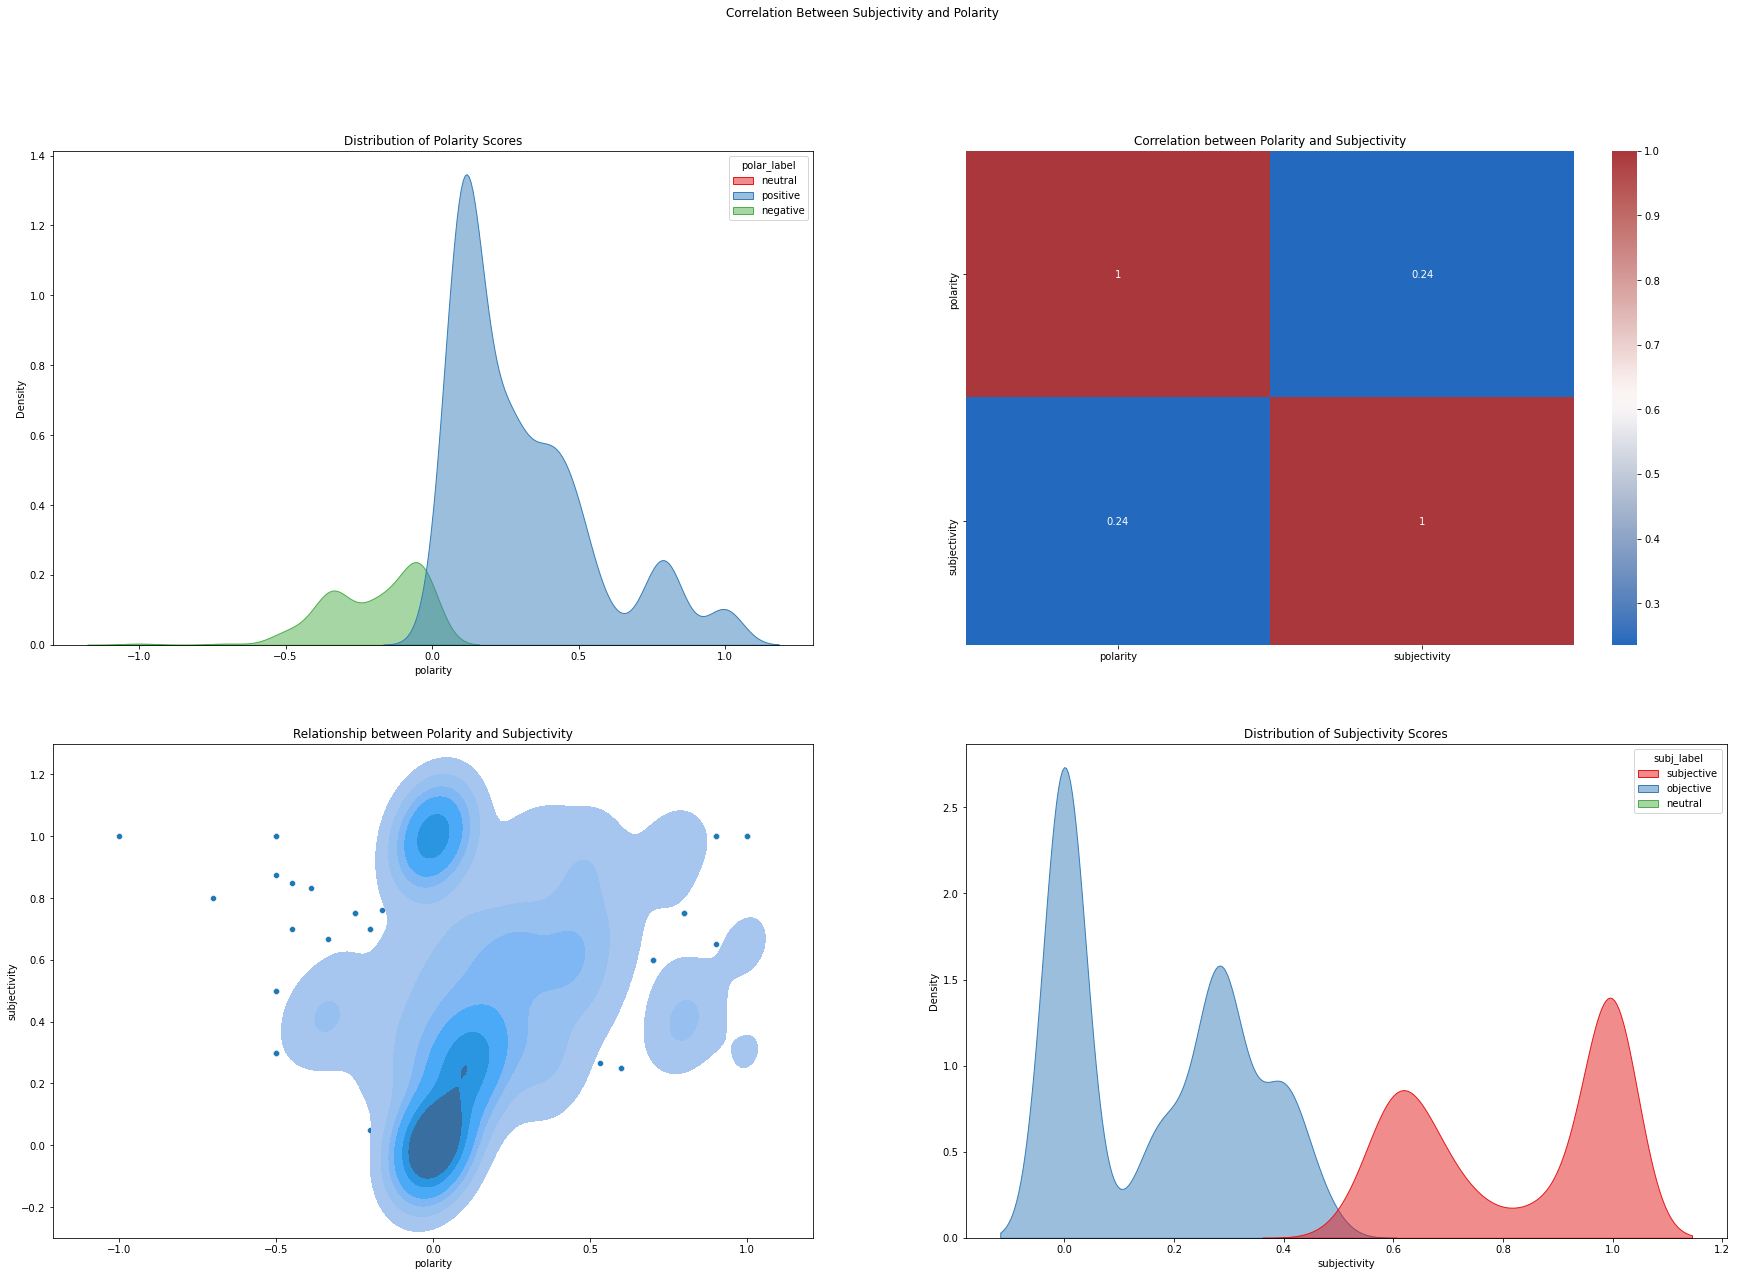

<Figure size 720x720 with 0 Axes>

In [54]:
fig, axs = plt.subplots(2,2)
plt.figure(figsize=(10,10))
fig.set_size_inches(30,20)

fig.suptitle('Correlation Between Subjectivity and Polarity')

#polarity distribution
sns.kdeplot(
   data=df_vis, x="polarity", hue="polar_label",
   fill=True, palette="Set1",
   alpha=.5, linewidth=1,ax=axs[0,0]
)
axs[0,0].set_title("Distribution of Polarity Scores")

#correlation between polarity and subjectivity
corr_s_p = df_vis[['polarity','subjectivity']].corr()
sns.heatmap(corr_s_p,annot=True,cmap="vlag",ax=axs[0,1])
axs[0,1].set_title("Correlation between Polarity and Subjectivity")

#jointplot of subjectivity and polarity
sns.scatterplot(data=df_vis, x="polarity", y="subjectivity",ax=axs[1,0])
sns.kdeplot(data=df_vis, x="polarity", y="subjectivity", levels=7,
            linewidths=1,ax=axs[1,0],palette='mako',fill=True)
axs[1,0].set_title("Relationship between Polarity and Subjectivity")

#subjectivity distribution
sns.kdeplot(
   data=df_vis, x="subjectivity", hue="subj_label",
   fill=True, palette="Set1",
   alpha=.5, linewidth=1,ax=axs[1,1]
)
axs[1,1].set_title("Distribution of Subjectivity Scores")

plt.show()

# Classification

## Pre-Processing

### Encoding the data

In [55]:
df_label.tail()

cleaned_tweets           Timestamp  \
1995  indonesia men single rise anthony sinisuka gin... 2021-07-31 07:20:01   
1996                  fight place semifinal cest srjdla 2021-07-31 07:20:00   
1997        little known village kabarwala thrower verg 2021-07-31 07:20:00   
1998  one win gold nesthy petecio fight woman feathe... 2021-07-31 07:19:59   
1999                                        hello tokyo 2021-07-31 07:19:59   

      polarity  subjectivity polar_label  subj_label  
1995  0.089286      0.273810    positive   objective  
1996  0.000000      0.000000     neutral   objective  
1997 -0.187500      0.500000    negative     neutral  
1998  0.169444      0.647222    positive  subjective  
1999  0.000000      0.000000     neutral   objective

In [56]:
df_class = df_label.copy()

In [57]:
df_class.tail()

cleaned_tweets           Timestamp  \
1995  indonesia men single rise anthony sinisuka gin... 2021-07-31 07:20:01   
1996                  fight place semifinal cest srjdla 2021-07-31 07:20:00   
1997        little known village kabarwala thrower verg 2021-07-31 07:20:00   
1998  one win gold nesthy petecio fight woman feathe... 2021-07-31 07:19:59   
1999                                        hello tokyo 2021-07-31 07:19:59   

      polarity  subjectivity polar_label  subj_label  
1995  0.089286      0.273810    positive   objective  
1996  0.000000      0.000000     neutral   objective  
1997 -0.187500      0.500000    negative     neutral  
1998  0.169444      0.647222    positive  subjective  
1999  0.000000      0.000000     neutral   objective

In [58]:
df_class['polar_label'] = pd.factorize(df_class['polar_label'])[0]
df_class['subj_label'] = pd.factorize(df_class['subj_label'])[0]

In [59]:
df_class.tail()

cleaned_tweets           Timestamp  \
1995  indonesia men single rise anthony sinisuka gin... 2021-07-31 07:20:01   
1996                  fight place semifinal cest srjdla 2021-07-31 07:20:00   
1997        little known village kabarwala thrower verg 2021-07-31 07:20:00   
1998  one win gold nesthy petecio fight woman feathe... 2021-07-31 07:19:59   
1999                                        hello tokyo 2021-07-31 07:19:59   

      polarity  subjectivity  polar_label  subj_label  
1995  0.089286      0.273810            1           1  
1996  0.000000      0.000000            0           1  
1997 -0.187500      0.500000            2           2  
1998  0.169444      0.647222            1           0  
1999  0.000000      0.000000            0           1

Polarity:

*   neutral = 1
*   positive = 2
*   negative = 0

Subjectivity:

*   subjective = 0
*   objective = 1
*   neutral = 2



### Word vectorization

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

vect = CountVectorizer(max_features=200, token_pattern=r'[A-Za-z]+', stop_words=ENGLISH_STOP_WORDS)
vect.fit(df_class.cleaned_tweets)
vect_trans = vect.transform(df_class.cleaned_tweets)
tweet_class = pd.DataFrame(vect_trans.toarray(), columns=vect.get_feature_names())
tweet_class['polar_label'] = df_class.polar_label
tweet_class['subj_label'] = df_class.subj_label
tweet_class.tail(10)

aapne  advance  amazing  amp  anders  anthony  antonsen  assured  athle  \
1990      0        0        0    0       0        0         0        0      0   
1991      0        0        0    0       0        0         0        0      0   
1992      0        0        0    0       0        0         0        0      0   
1993      0        0        0    0       0        1         0        0      0   
1994      0        0        0    0       0        0         0        0      0   
1995      0        0        0    0       0        1         0        0      0   
1996      0        0        0    0       0        0         0        0      0   
1997      0        0        0    0       0        0         0        0      0   
1998      0        0        0    0       0        0         0        0      0   
1999      0        0        0    0       0        0         0        0      0   

      athlete  ...  wanting  watch  win  winning  witness  woman  world  wow  \
1990        0  ...        0      0    0        0        0      0      0    0   
1991        1  ...        0      0    0        0        0      0      0    0   
1992        0  ...        0      0    0        0        0      0      0    0   
1993        0  ...        0      0    0        0        0      0      0    0   
1994        0  ...        0      0    1        1        0      0      0    0   
1995        0  ...        0      0    0        0        0      0      0    0   
1996        0  ...        0      0    0        0        0      0      0    0   
1997        0  ...        0      0    0        0        0      0      0    0   
1998        0  ...        0      0    1        0        0      1      0    0   
1999        0  ...        0      0    0        0        0      0      0    0   

      polar_label  subj_label  
1990            1           1  
1991            0           1  
1992            2           1  
1993            1           0  
1994            1           0  
1995            1           1  
1996            0           1  
1997            2           2  
1998            1           0  
1999            0           1  

[10 rows x 202 columns]

## Training and Evaluation

In [61]:
# Define the vector of targets and matrix of features
y = tweet_class.polar_label
X = tweet_class.drop('polar_label', axis=1)

In [62]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123, stratify=y)

In [63]:
# Import the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [64]:
lr_model=LogisticRegression().fit(X_train,y_train)
svm_model=SVC().fit(X_train,y_train)
nn_model=MLPClassifier().fit(X_train,y_train)

print('Logistic Regression Accuracy: {:.2f}%'.format(lr_model.score(X_test,y_test)*100))
print('Support Vector Machine Accuracy: {:.2f}%'.format(svm_model.score(X_test,y_test)*100))
print('Neural Network Accuracy: {:.2f}%'.format(nn_model.score(X_test,y_test)*100))

C:\Users\Haziq\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression Accuracy: 81.75%
Support Vector Machine Accuracy: 83.31%
Neural Network Accuracy: 83.44%


In [65]:
from sklearn.metrics import accuracy_score as acs
#make predictions
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nn_pred = nn_model.predict(X_test)

#accuracy score
from sklearn.metrics import r2_score as r2
print(acs(lr_pred, y_test))
print(acs(svm_pred, y_test))
print(acs(nn_pred, y_test))

0.8175
0.833125
0.834375


### Confusion Matrix

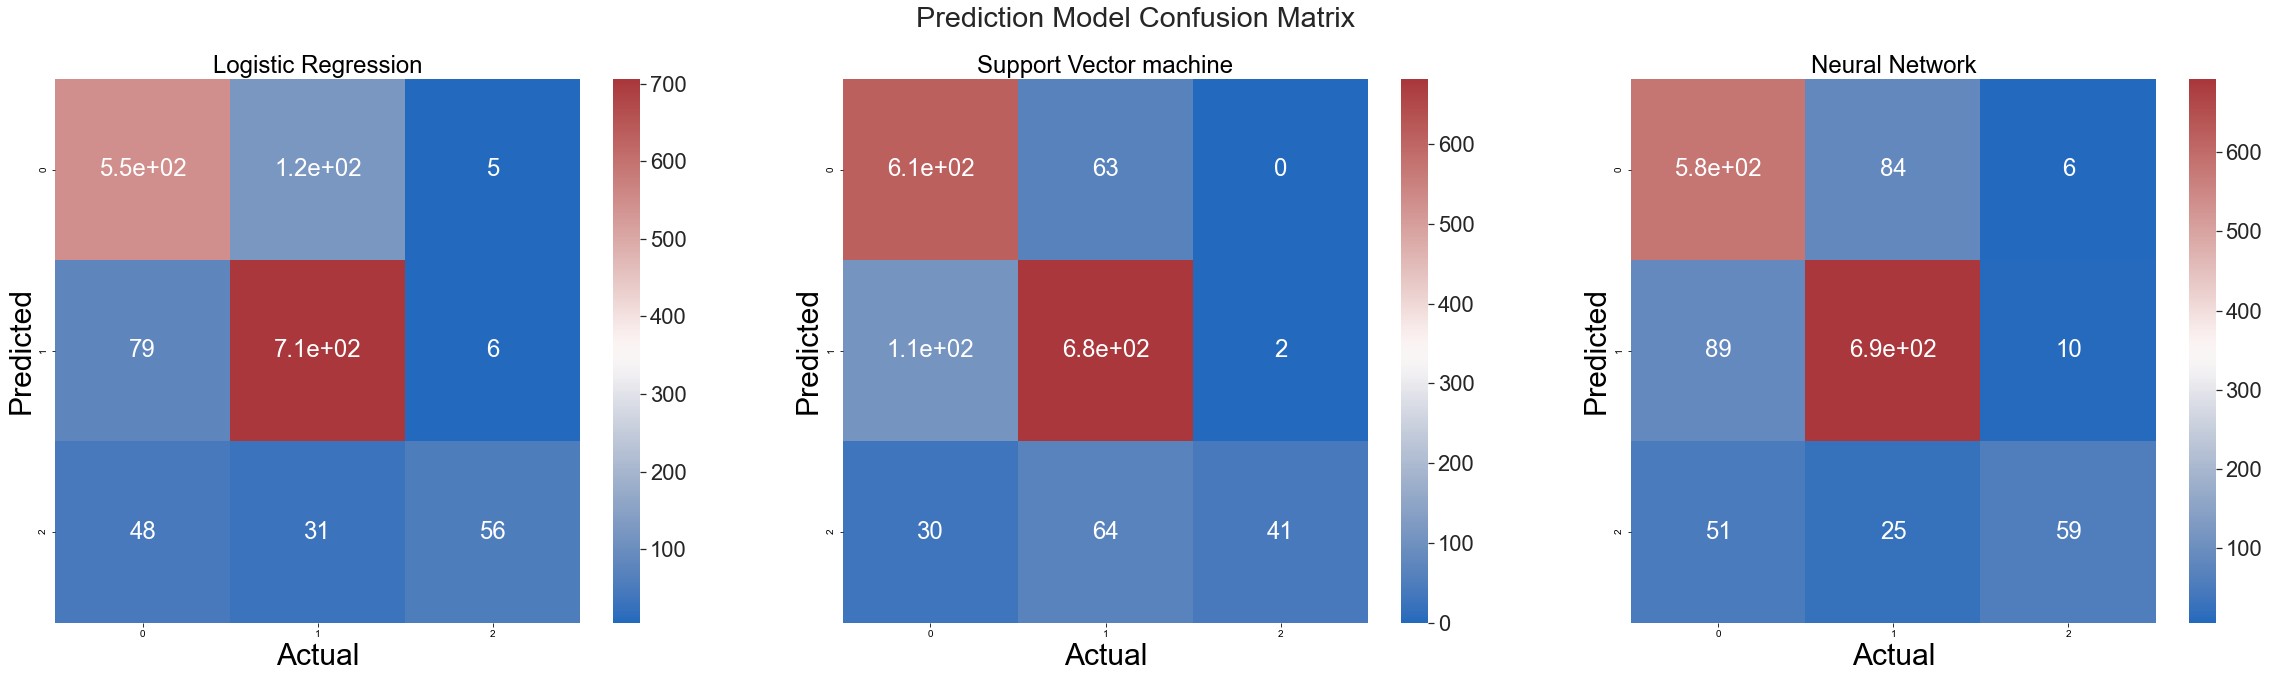

<Figure size 720x720 with 0 Axes>

In [66]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, axs = plt.subplots(1,3)
plt.figure(figsize=(10,10))
fig.set_size_inches(40, 10)

lr_cmat = confusion_matrix(y_test,lr_pred)
svm_cmat = confusion_matrix(y_test,svm_pred)
nn_cmat = confusion_matrix(y_test,nn_pred)

color ='vlag'
sns.set(font_scale=2)
fig.suptitle("Prediction Model Confusion Matrix")

sns.heatmap(lr_cmat,annot=True,ax=axs[0],cmap=color)
axs[0].set_title('Logistic Regression')
axs[0].set_xlabel('Actual',fontsize =30)
axs[0].set_ylabel('Predicted',fontsize =30)

sns.heatmap(svm_cmat,annot=True,ax=axs[1],cmap=color)
axs[1].set_title('Support Vector machine')
axs[1].set_xlabel('Actual',fontsize =30)
axs[1].set_ylabel('Predicted',fontsize =30)

sns.heatmap(nn_cmat,annot=True,ax=axs[2],cmap=color)
axs[2].set_title('Neural Network')
axs[2].set_xlabel('Actual',fontsize =30)
axs[2].set_ylabel('Predicted',fontsize =30)

plt.show()

### Classification Report

In [67]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

In [68]:
true = y_test
target_names = list(['negative','neutral','positive'])

In [69]:
lr_clf_report = classification_report(true,
                                   lr_pred,
                                   target_names=target_names,
                                   output_dict=True)

svm_clf_report = classification_report(true,
                                   svm_pred,
                                   target_names=target_names,
                                   output_dict=True)

nn_clf_report = classification_report(true,
                                   nn_pred,
                                   target_names=target_names,
                                   output_dict=True)

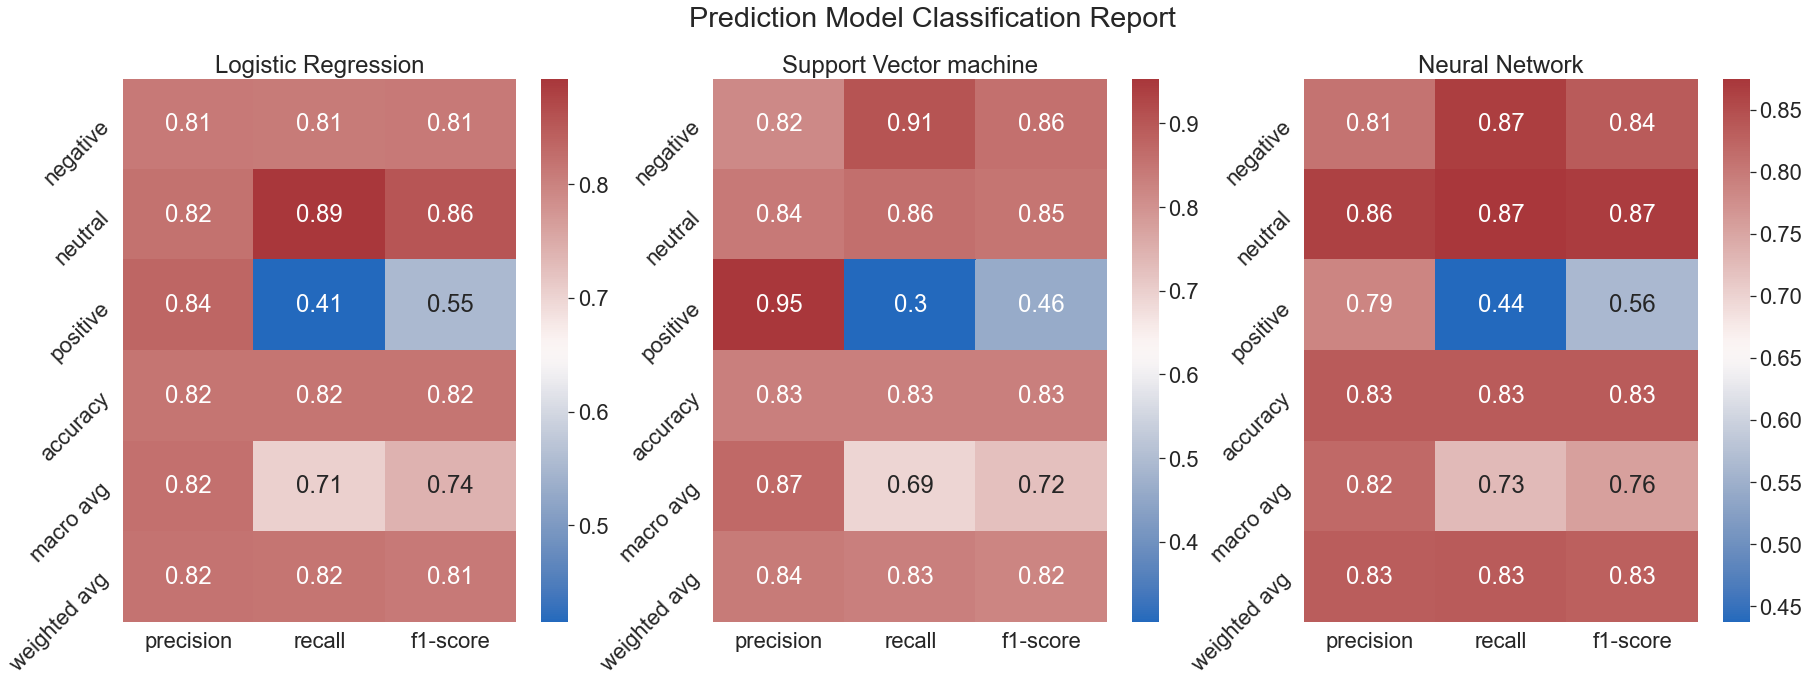

<Figure size 1008x720 with 0 Axes>

In [70]:
fig, axs = plt.subplots(1,3)
plt.figure(figsize=(14,10))
fig.set_size_inches(30, 10)

fig.suptitle("Prediction Model Classification Report")

sns.set(font_scale=2)
color ='vlag'

sns.heatmap(pd.DataFrame(lr_clf_report).iloc[:-1, :].T, annot=True,ax=axs[0],cmap=color)
axs[0].set_title('Logistic Regression')
axs[0].tick_params(labelrotation=45,axis='y')


sns.heatmap(pd.DataFrame(svm_clf_report).iloc[:-1, :].T, annot=True,ax=axs[1],cmap=color)
axs[1].set_title('Support Vector machine')
axs[1].tick_params(labelrotation=45,axis='y')


sns.heatmap(pd.DataFrame(nn_clf_report).iloc[:-1, :].T, annot=True,ax=axs[2],cmap=color)
axs[2].set_title('Neural Network')
axs[2].tick_params(labelrotation=45,axis='y')

plt.show()